# Anomaly detection

The goal of the project is to develop a method to carry out anomaly detection in IP traffic. In few words, the principle of the method is to build a profile of each IP address under the form of a small graph, called graphlet. We then build a model using Support Vector Machine to distinguish normal from malicious end hosts from an annotated trace. The last step will be to try to detect attack in a not annotated trace.

In [2]:
import sklearn
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

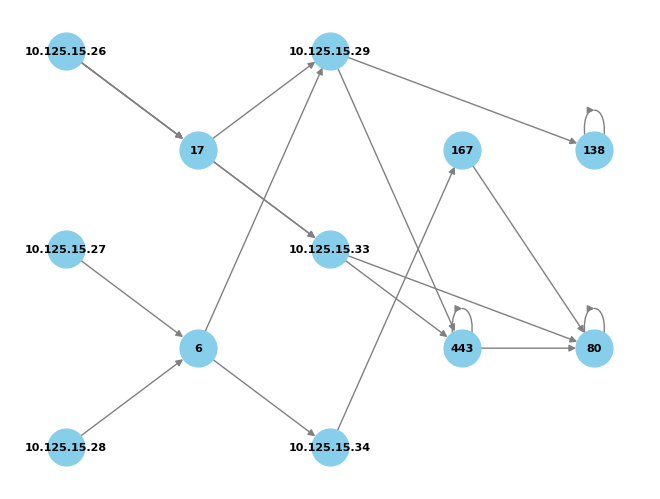

In [3]:
# 3. Build (by hand) the graphlets corresponding to the following network flows.
# format: srcIP protocol dstIP sPort dPort
def add_flow(graph, src_ip, protocol, dst_ip, src_port, dst_port):
    graph.add_node(src_ip, layer=1)
    graph.add_node(protocol, layer=2)
    graph.add_node(dst_ip, layer=3)
    graph.add_node(src_port, layer=4)
    graph.add_node(dst_port, layer=5)

    graph.add_edge(src_ip, protocol)
    graph.add_edge(protocol, dst_ip)
    graph.add_edge(dst_ip, src_port)
    graph.add_edge(src_port, dst_port)
    
G = nx.MultiDiGraph()

flows = [
    ("10.125.15.26", 17, "10.125.15.29", 138, 138),
    ("10.125.15.26", 17, "10.125.15.33", 80, 80),
    ("10.125.15.27", 6, "10.125.15.34", 167, 80),
    ("10.125.15.28", 6, "10.125.15.29", 443, 443),
    ("10.125.15.26", 17, "10.125.15.33", 443, 80),
]

for flow in flows:
    add_flow(G, *flow)

pos = nx.multipartite_layout(G, subset_key="layer")
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=8, edge_color='gray', arrows=True)
plt.show()

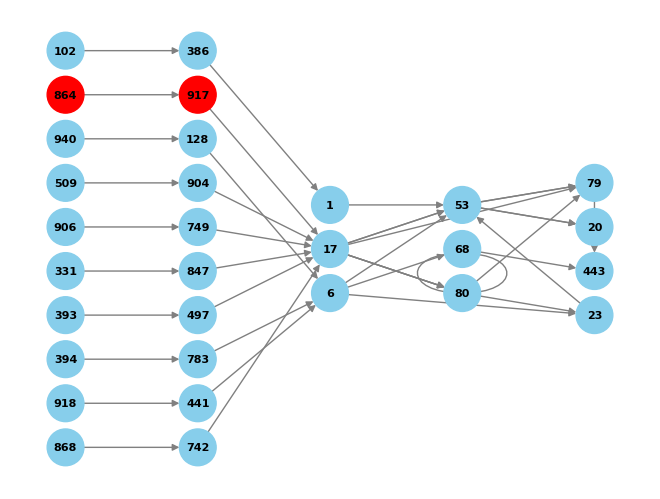

In [8]:
# 4. A traffic trace with annotated flows (normal or malicious) is provided in the file annotated-trace.txt. You will be using it to build your model of end hosts.
df_annotated = pd.read_csv("annotated-trace.csv", header=None)

def add_flow(graph, src_ip, protocol, dst_ip, src_port, dst_port, annotation):
    graph.add_node(src_ip, layer=1, annotation=annotation)
    graph.add_node(protocol, layer=2, annotation=annotation)
    graph.add_node(dst_ip, layer=3, annotation=annotation)
    graph.add_node(src_port, layer=4, annotation=annotation)
    graph.add_node(dst_port, layer=5, annotation=annotation)

    graph.add_edge(src_ip, protocol, annotation=annotation)
    graph.add_edge(protocol, dst_ip, annotation=annotation)
    graph.add_edge(dst_ip, src_port, annotation=annotation)
    graph.add_edge(src_port, dst_port, annotation=annotation)

G = nx.MultiDiGraph()

for index, row in df_annotated.head(10).iterrows():
    add_flow(G, *row)

pos = nx.multipartite_layout(G, subset_key="layer")

node_colors = ['red' if G.nodes[node].get('annotation') == 'anomaly' else 'skyblue' for node in G.nodes()]
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color=node_colors, font_color='black', font_size=8, edge_color='gray', arrows=True)
plt.show()

Red nodes correspond to malicious flows while skyblue nodes correspond to normal flows.